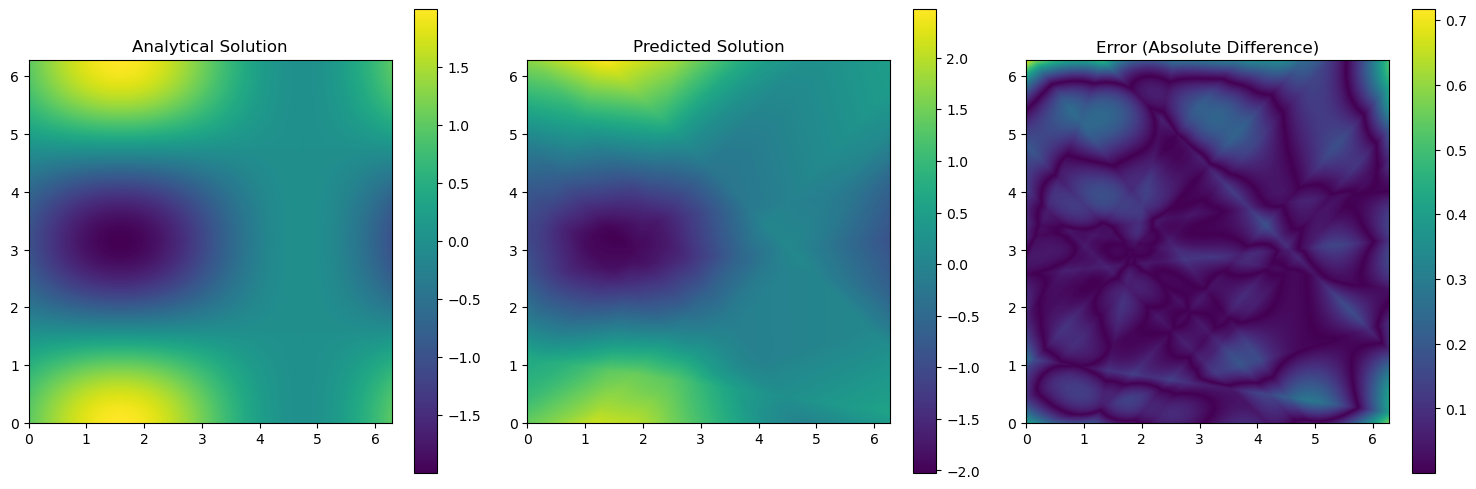

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t)

# Define the neural network model
class KleinGordonNN(nn.Module):
    def __init__(self):
        super(KleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordonNN()

# Define the resolution of the grid
num_points_x = 500 # Increase the number of points in the x-direction
num_points_t = 500  # Increase the number of points in the t-direction

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, and the error
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.colorbar()

plt.subplot(132)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution')
plt.colorbar()

plt.subplot(133)
error = np.abs(analytical_values - predicted_values)
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
# For this case, we can modify the code to generate a synthetic dataset for training. 
# Here's the modified code that generates a synthetic dataset for training the neural network:

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network model
class KleinGordonNN(nn.Module):
    def __init__(self):
        super(KleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordonNN()

# Define the resolution of the grid
num_points_x = 200  # Increase the number of points in the x-direction
num_points_t = 200  # Increase the number of points in the t-direction

# Generate synthetic data with random noise
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Generate synthetic data with noise
true_solution = np.sin(grid_x) * np.cos(grid_t)
synthetic_data = true_solution + 0.1 * np.random.randn(num_points_x, num_points_t)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)
outputs = torch.Tensor(synthetic_data.ravel())

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, outputs.view(grid_x.shape))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the true solution, predicted solution, and the error
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(true_solution, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('True Solution')
plt.colorbar()

plt.subplot(132)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution')
plt.colorbar()

plt.subplot(133)
error = np.abs(true_solution - predicted_values)
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.tight_layout()
plt.show()


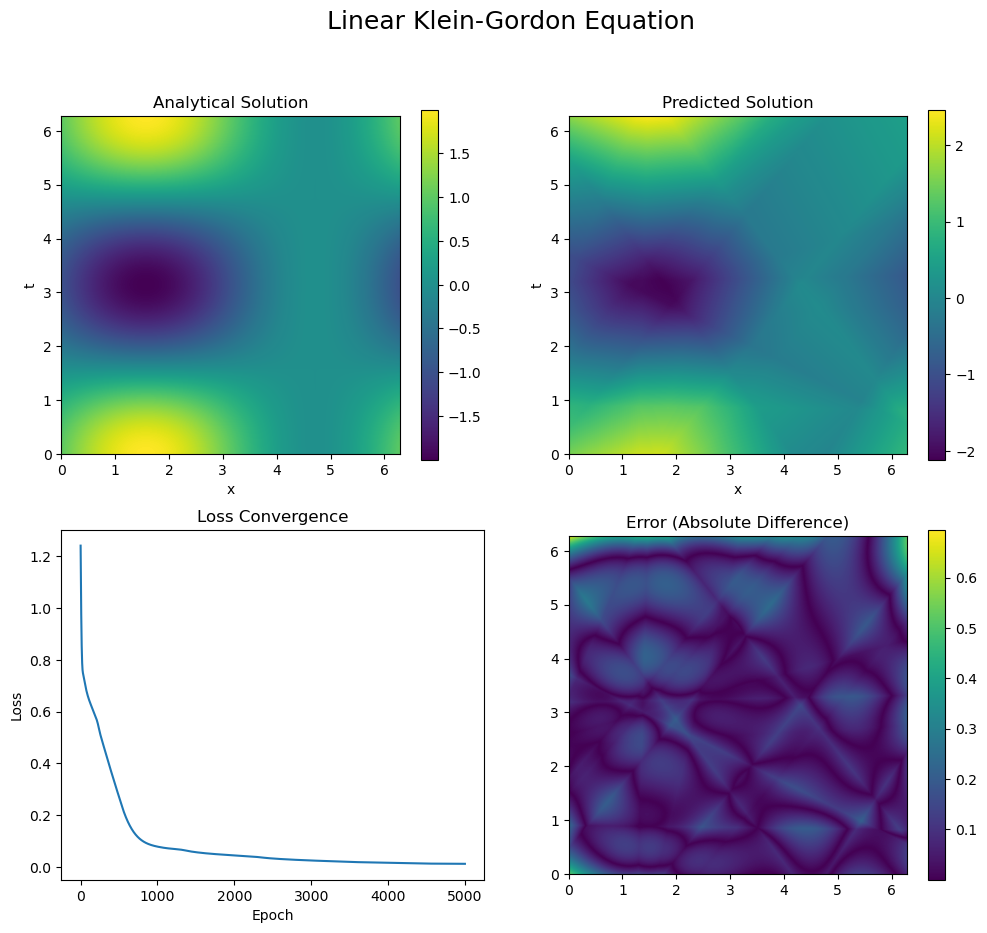

In [1]:

# This code will generate an error plot and a convergence plot along with the previous visualizations. 
# The error plot shows the absolute difference between the analytical and predicted 
# solutions, while the convergence plot displays how the loss value changes during training 
# (convergence of the neural network).




import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t)

# Define the neural network model
class KleinGordonNN(nn.Module):
    def __init__(self):
        super(KleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordonNN()

# Define the resolution of the grid
num_points_x = 500  # Increase the number of points in the x-direction
num_points_t = 500  # Increase the number of points in the t-direction

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()


# Plot the analytical solution, predicted solution, error, and convergence
plt.figure(figsize=(12, 10))

# Annotations
plt.suptitle('Linear Klein-Gordon Equation', fontsize=18)
plt.tight_layout()

plt.subplot(221)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(222)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(223)
plt.plot(losses)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(224)
error = np.abs(analytical_values - predicted_values)
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.show()

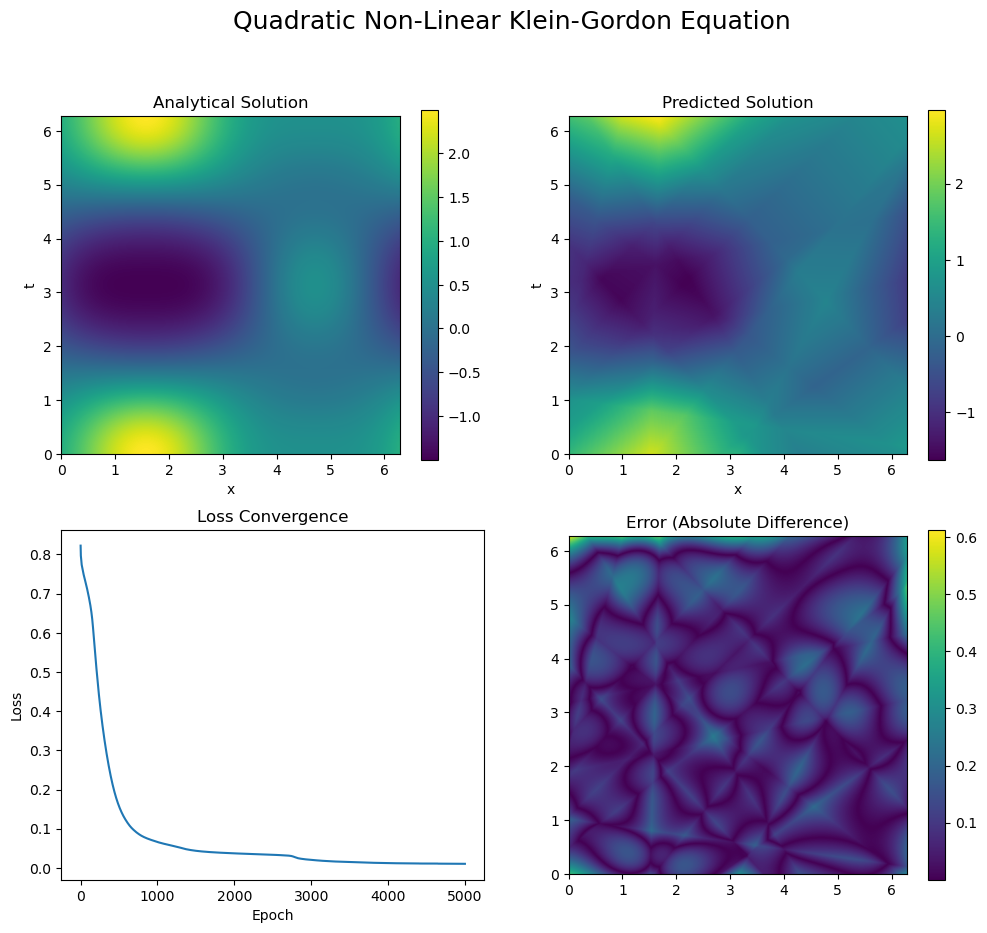

In [1]:

# the code for solving the quadratic non-linear Klein-Gordon equation and compare it with the 
# analytical result, 
# We would need to define the equation and its corresponding analytical solution. 
# We would also need to update the neural network model to accommodate the non-linear equation. 



import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the quadratic non-linear Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t) + 0.5 * (np.sin(x))**2 * np.cos(t)**2

# Define the neural network model for the quadratic non-linear equation
class QuadraticNonLinearKleinGordonNN(nn.Module):
    def __init__(self):
        super(QuadraticNonLinearKleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function for the quadratic non-linear equation
criterion = nn.MSELoss()

# Create the neural network model
net = QuadraticNonLinearKleinGordonNN()

# Define the resolution of the grid
num_points_x = 500  # Increase the number of points in the x-direction
num_points_t = 500  # Increase the number of points in the t-direction

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)

# Compute the analytical solution for the quadratic non-linear equation on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, error, and convergence
plt.figure(figsize=(12, 10))

# Annotations
plt.suptitle('Quadratic Non-Linear Klein-Gordon Equation', fontsize=18)
plt.tight_layout()

plt.subplot(221)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(222)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(223)
plt.plot(losses)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(224)
error = np.abs(analytical_values - predicted_values)
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.show()


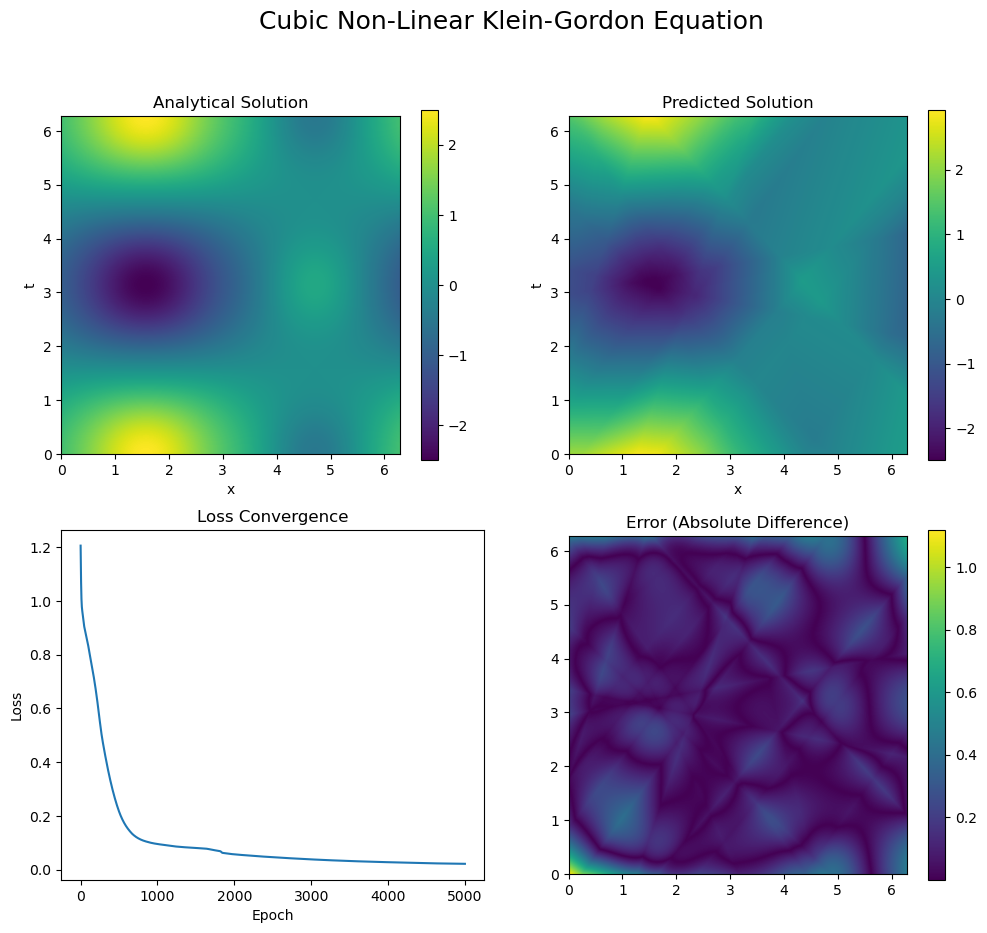

In [1]:
# cubic non-linaer


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the cubic non-linear Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t) + 0.5 * (np.sin(x))**3 * np.cos(t)**3

# Define the neural network model for the cubic non-linear equation
class CubicNonLinearKleinGordonNN(nn.Module):
    def __init__(self):
        super(CubicNonLinearKleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Define the loss function for the cubic non-linear equation
criterion = nn.MSELoss()

# Create the neural network model
net = CubicNonLinearKleinGordonNN()

# Define the resolution of the grid
num_points_x = 500  # Increase the number of points in the x-direction
num_points_t = 500  # Increase the number of points in the t-direction

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)

# Compute the analytical solution for the cubic non-linear equation on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, error, and convergence
plt.figure(figsize=(12, 10))

# Annotations
plt.suptitle('Cubic Non-Linear Klein-Gordon Equation', fontsize=18)
plt.tight_layout()

plt.subplot(221)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(222)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

plt.subplot(223)
plt.plot(losses)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(224)
error = np.abs(analytical_values - predicted_values)
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.show()



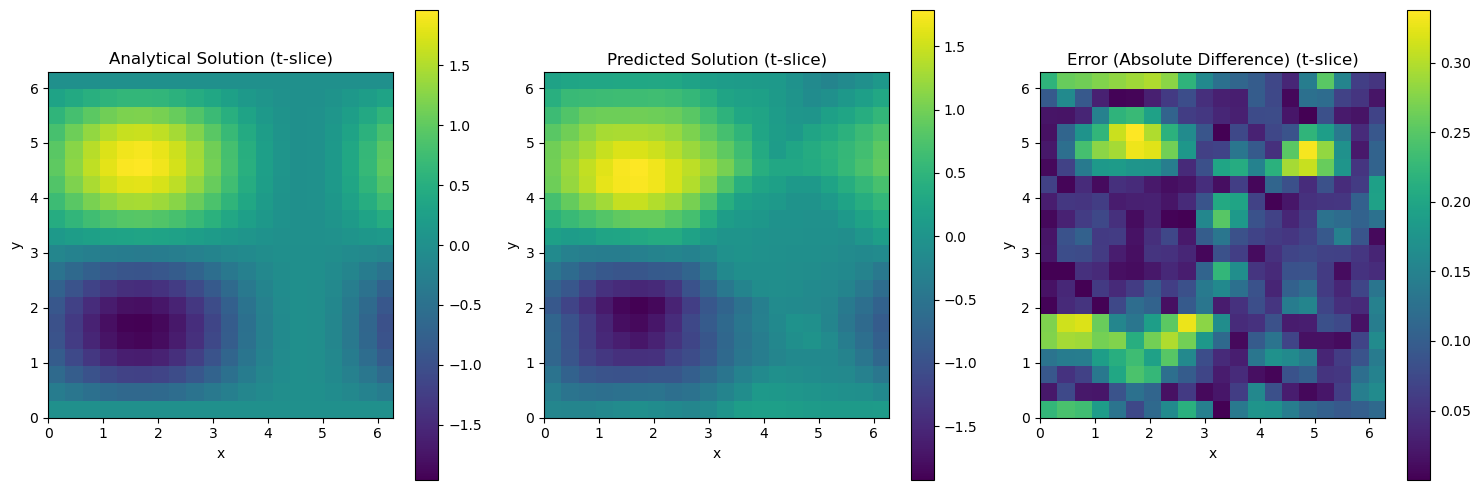

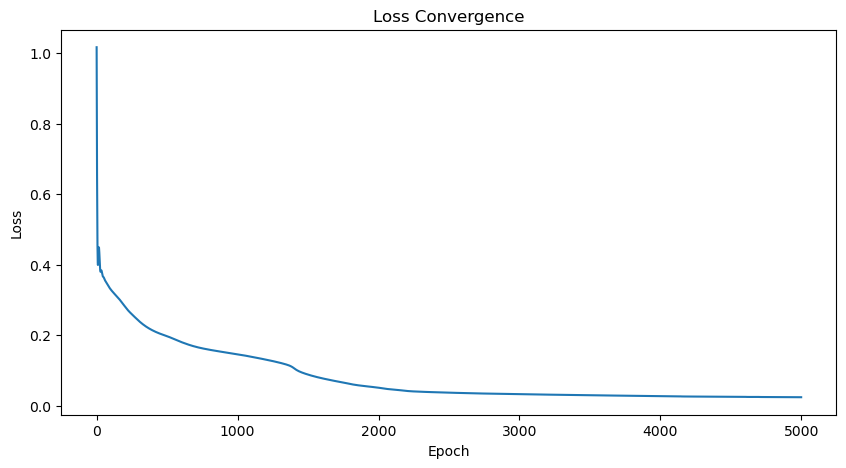

In [1]:
#3D
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the 3D Klein-Gordon equation
def analytical_solution(x, y, t):
    return (1 + np.sin(x)) * np.cos(t) * np.sin(y)

# Define the neural network model for 3D Klein-Gordon equation
class KleinGordon3DNN(nn.Module):
    def __init__(self):
        super(KleinGordon3DNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordon3DNN()

# Define the resolution of the grid
num_points_x = 20  # Increase the number of points in the x-direction
num_points_y = 20  # Increase the number of points in the y-direction
num_points_t = 20  # Increase the number of points in the t-direction

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
y_values = np.linspace(0, 2 * np.pi, num_points_y)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, y, t) values
grid_x, grid_y, grid_t = np.meshgrid(x_values, y_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_y.ravel(), grid_t.ravel())).T)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_y, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, error, and convergence
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(analytical_values[:, :, num_points_t // 2], extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution (t-slice)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(132)
plt.imshow(predicted_values[:, :, num_points_t // 2], extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Predicted Solution (t-slice)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(133)
error = np.abs(analytical_values[:, :, num_points_t // 2] - predicted_values[:, :, num_points_t // 2])
plt.imshow(error, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference) (t-slice)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.tight_layout()

# Plot the convergence plot
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


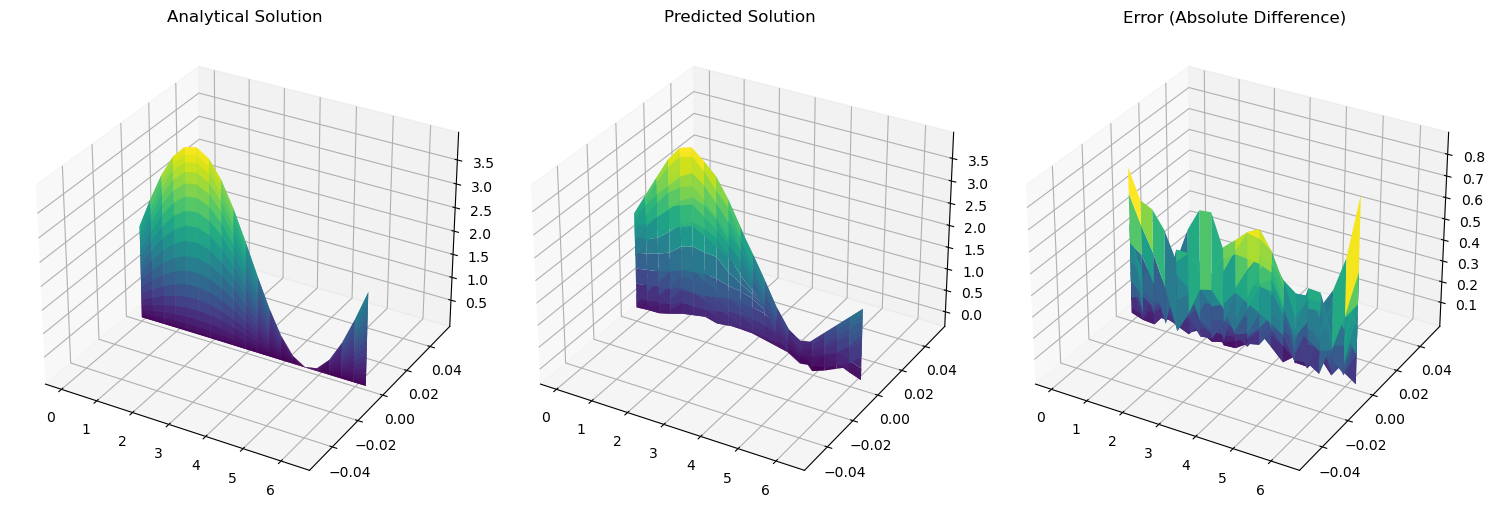

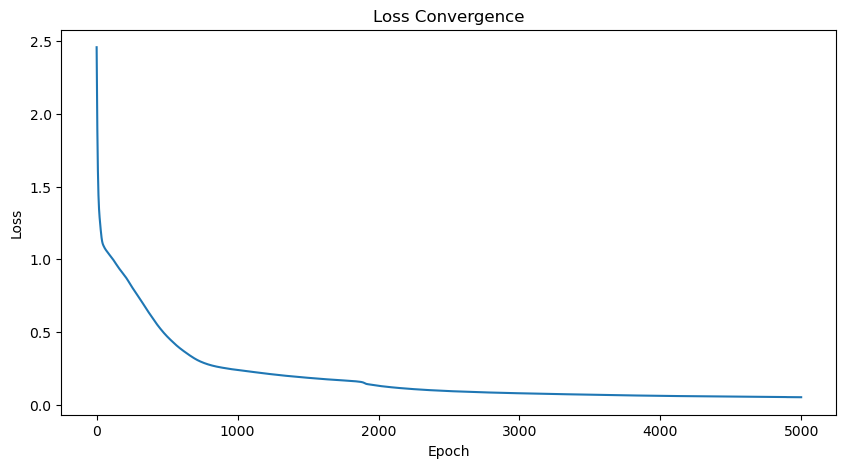

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the analytical solution for the 3D Klein-Gordon equation
def analytical_solution(x, y, t):
    return (1 + np.sin(x)) * (1 + np.sin(y)) * np.cos(t)

# Define the neural network model
class KleinGordon3DNN(nn.Module):
    def __init__(self):
        super(KleinGordon3DNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordon3DNN()

# Define the resolution of the grid
num_points = 20  # Increase the number of points
x_values = np.linspace(0, 2 * np.pi, num_points)
y_values = np.linspace(0, 2 * np.pi, num_points)
t_values = np.linspace(0, 2 * np.pi, num_points)

# Create a grid of (x, y, t) values
grid_x, grid_y, grid_t = np.meshgrid(x_values, y_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_y.ravel(), grid_t.ravel())).T)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_y, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, and the error
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(grid_x[0], grid_y[0], analytical_values[:, :, 0], cmap='viridis')
ax1.set_title('Analytical Solution')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(grid_x[0], grid_y[0], predicted_values[:, :, 0], cmap='viridis')
ax2.set_title('Predicted Solution')

ax3 = fig.add_subplot(133, projection='3d')
error = np.abs(analytical_values - predicted_values)
ax3.plot_surface(grid_x[0], grid_y[0], error[:, :, 0], cmap='viridis')
ax3.set_title('Error (Absolute Difference)')

plt.tight_layout()

# Plot the convergence plot
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


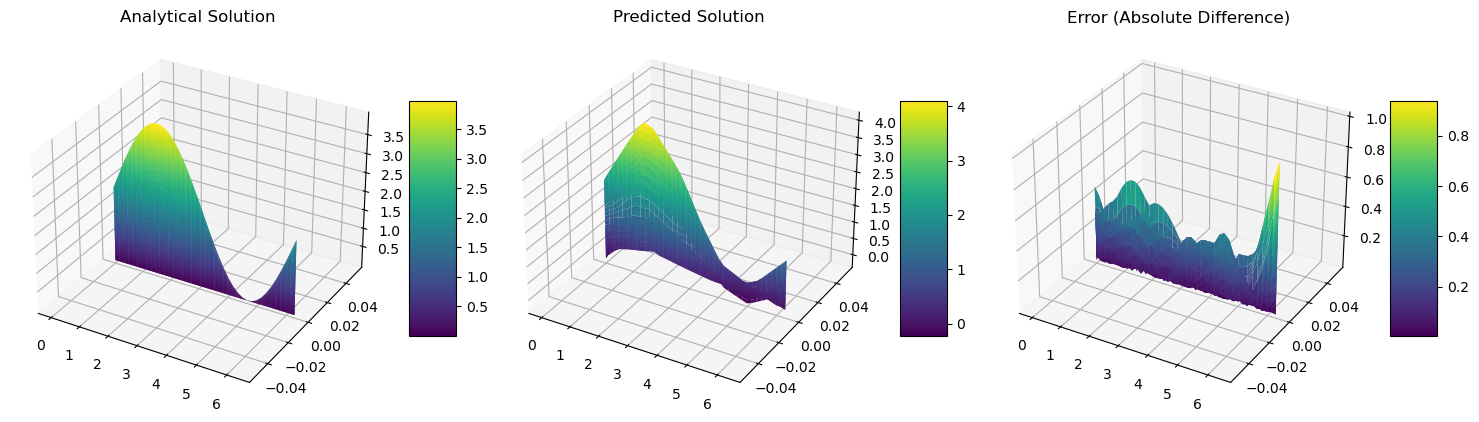

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the analytical solution for the 3D Klein-Gordon equation
def analytical_solution(x, y, t):
    return (1 + np.sin(x)) * (1 + np.sin(y)) * np.cos(t)

# Define the neural network model
class KleinGordon3DNN(nn.Module):
    def __init__(self):
        super(KleinGordon3DNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordon3DNN()

# Define the resolution of the grid
num_points = 40 # Increase the number of points
x_values = np.linspace(0, 2 * np.pi, num_points)
y_values = np.linspace(0, 2 * np.pi, num_points)
t_values = np.linspace(0, 2 * np.pi, num_points)

# Create a grid of (x, y, t) values
grid_x, grid_y, grid_t = np.meshgrid(x_values, y_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_y.ravel(), grid_t.ravel())).T)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_y, grid_t)

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_values))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Plot the analytical solution, predicted solution, and the error
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(grid_x[0], grid_y[0], analytical_values[:, :, 0], cmap='viridis')
ax1.set_title('Analytical Solution')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(grid_x[0], grid_y[0], predicted_values[:, :, 0], cmap='viridis')
ax2.set_title('Predicted Solution')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

ax3 = fig.add_subplot(133, projection='3d')
error = np.abs(analytical_values - predicted_values)
surf3 = ax3.plot_surface(grid_x[0], grid_y[0], error[:, :, 0], cmap='viridis')
ax3.set_title('Error (Absolute Difference)')
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

plt.tight_layout()

# # Plot the convergence plot
# plt.figure(figsize=(10, 5))
# plt.plot(losses)
# plt.title('Loss Convergence')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

plt.show()
